# # Simple Linear Regression 

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#height in cm
x=np.array([[151],[174],[138],[186],[128],[136],[179],[163],[152],[131]])
# weight in kg
y=np.array([63,81,56,91,47,57,76,72,62,48])

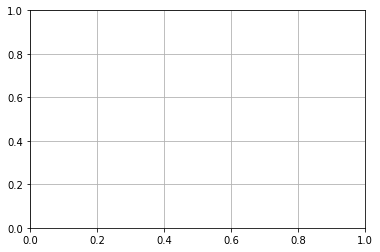

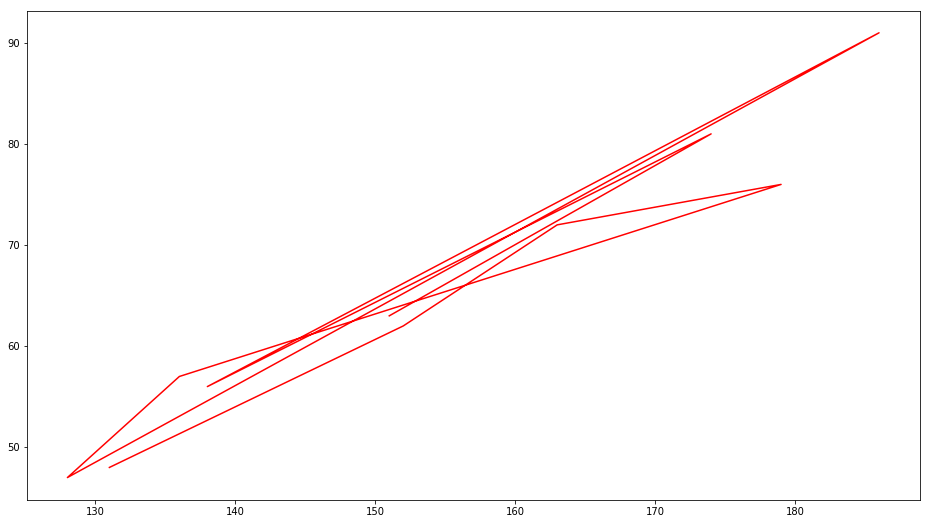

In [53]:
plt.grid()
plt.figure(figsize=(16,9))
plt.plot(x,y,color='red')

In [54]:
x.shape

(10, 1)

In [55]:
y.shape

(10,)

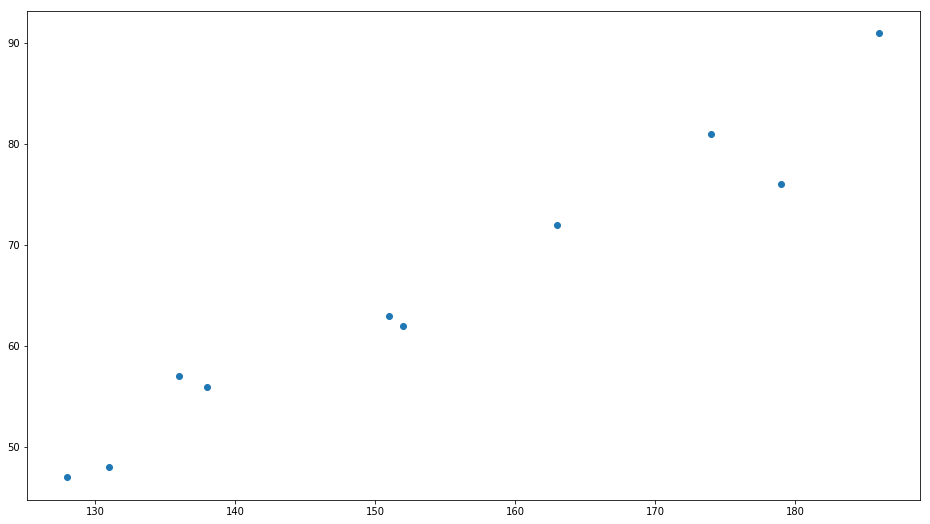

In [56]:
plt.figure(figsize=(16,9))
plt.scatter(x,y)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# create the object
regressor=LinearRegression()

In [59]:
# train the model
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
regressor.coef_

array([0.67461045])

In [61]:
# value of intercept
regressor.intercept_

-38.45508707607698

In [62]:
regressor.predict([[185]])

array([86.34784601])

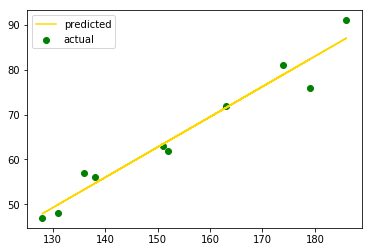

In [63]:
# Plot the data
plt.scatter(x,y,label='actual',color='green')
plt.plot(x,regressor.predict(x),label='predicted',color='gold')
plt.legend( )

# Linear Regression on actual dataset

In [64]:
import pandas as pd

In [65]:
df=pd.read_csv('Salary_Data.csv')

In [66]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [67]:
x=df['YearsExperience'].values  #his .values is used to convert array into series

y=df['Salary']

In [68]:
x=x.reshape(30,1)

In [69]:
x.shape

(30, 1)

In [70]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [71]:
df.corr()  #Pearson Correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [72]:
# Cross Vlidation---> splitting of dataset into training and testing dataset

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [74]:
x_train.shape

(22, 1)

In [75]:
x_test.shape

(8, 1)

In [76]:
x_train

array([[ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

# Build the model

In [77]:
from sklearn.linear_model import LinearRegression
regs=LinearRegression()

In [78]:
regs.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
regs.coef_

array([9379.71049195])

In [80]:
regs.intercept_

26986.691316737248

# Prediction on new dataset

In [111]:
y_pred=regs.predict(x_test)

In [112]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

# compare predicted and actual output

In [113]:
result=pd.DataFrame({
    'Exprience': x_test.reshape(8),
    'Actual Salary':y_test,
    'Predicted Salary':y_pred
})

In [114]:
result

,Exprience,Actual Salary,Predicted Salary
2,1.5,37731.0,41056.257055
28,10.3,122391.0,123597.709384
13,4.1,57081.0,65443.504334
10,3.9,63218.0,63567.562235
26,9.5,116969.0,116093.940990
24,8.7,109431.0,108590.172597
27,9.6,112635.0,117031.912039
11,4.0,55794.0,64505.533285


# Mean Absolute Error

In [117]:
mae=np.mean(abs(y_test-y_pred))

In [118]:
mae

3508.5455930660555

In [119]:
from sklearn.metrics import mean_absolute_error

In [120]:
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [141]:
mean_absolute_percentage_error(y_test,y_pred)*100

NameError: name 'mean_absolute_percentage_error' is not defined

In [123]:
import sklearn
sklearn.__version__

'0.19.2'

In [125]:
regs.score(x,y)

0.9559754875423769

In [130]:
regs.predict([[20]])

array([214580.90115566])

In [134]:
# y=mx+c
20*regs.coef_[0] + regs.intercept_

214580.90115565757

# Visualize

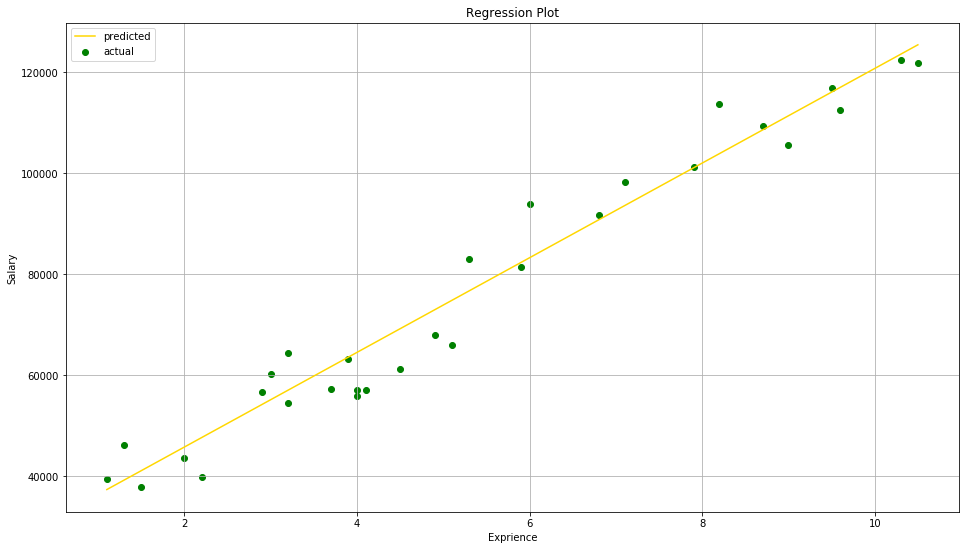

In [157]:
# Plot the data
plt.figure(figsize=(16,9))
plt.title('Regression Plot')
plt.xlabel('Exprience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x,y,label='actual',color='green')
plt.plot(x,regs.predict(x),label='predicted',color='gold')
plt.legend( )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


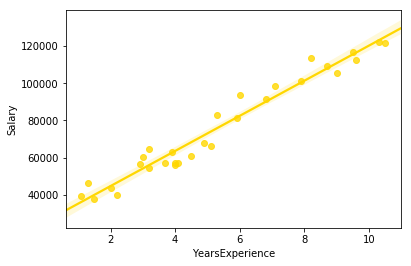

In [158]:
import seaborn as sns
sns.regplot(x='YearsExperience',y='Salary',data=df,color='gold')

#Multiple Regression 

In [159]:
df=pd.read_csv('mtcars.csv')

In [161]:
df.shape

(32, 11)

In [162]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [165]:
df.corrwith(df['mpg'])

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
dtype: float64

In [192]:
# seperate the input and output
x=df[['disp','hp','wt']]
y=df[['mpg']]

In [193]:
x

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320
3,258.0,110,3.215
4,360.0,175,3.440
5,225.0,105,3.460
6,360.0,245,3.570
7,146.7,62,3.190
8,140.8,95,3.150
9,167.6,123,3.440


In [194]:
y

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7
5,18.1
6,14.3
7,24.4
8,22.8
9,19.2


# Building the model

In [197]:
from sklearn.linear_model import LinearRegression
regs=LinearRegression()

In [198]:
regs.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
regs.coef_


array([[-9.37009081e-04, -3.11565508e-02, -3.80089058e+00]])

In [202]:
# check the accuracy or r2 score
regs.score(x,y)

0.8268361424946447

In [212]:
# predict on unseen data
disp=221
hp=102
wt=2.91
unseen_data=[disp,hp,wt]

In [213]:
unseen_data

[221, 102, 2.91]

In [214]:
regs.predict([unseen_data])

array([[22.65986648]])

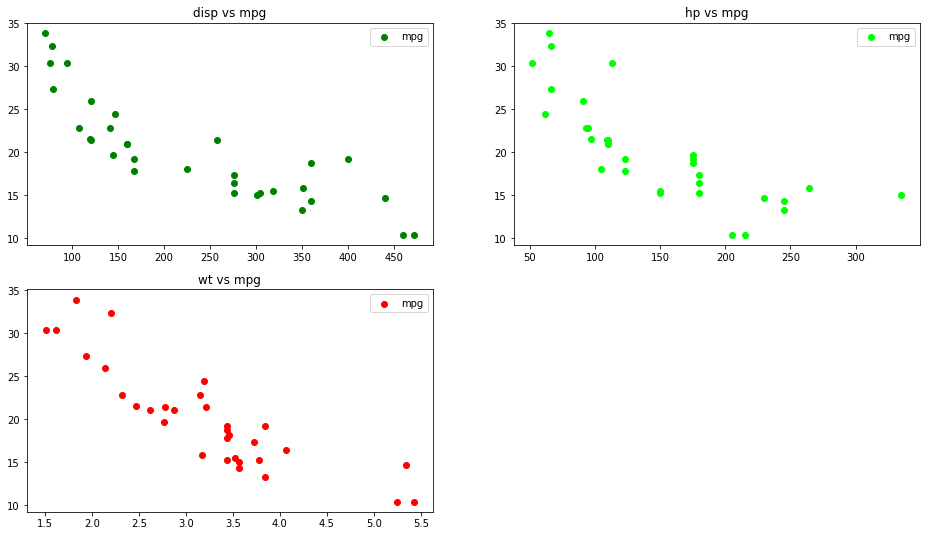

In [233]:
plt.figure(figsize=(16,9))
plt.grid()
plt.subplot(2,2,1)
plt.title('disp vs mpg')
plt.scatter(df['disp'],df['mpg'],color='green')
plt.legend()

plt.subplot(2,2,2)
plt.title('hp vs mpg')
plt.scatter(df['hp'],df['mpg'],color='lime')
plt.legend()

plt.subplot(2,2,3)
plt.title('wt vs mpg')
plt.scatter(df['wt'],df['mpg'],color='red')
plt.legend()

# Ploynomial Regression 

In [240]:
x=np.arange(0,100,0.25)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75,

In [245]:
# Linear Equation
# y=4.5*x+12

# Polynomial Equation
y1=4.5*x**2+12
y2=4.5*x**3+12
y3=4.5*x**4+12

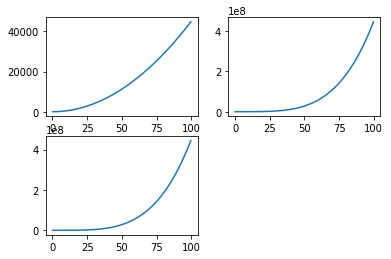

In [248]:
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.subplot(2,2,2)
plt.plot(x,y3)
plt.subplot(2,2,3)
plt.plot(x,y3)